# Multicollinearity:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/DataScience/New_Data/New_Data.csv")

In [3]:
df.head()

,Unnamed: 0,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,284,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,7.85,32.2
2,285,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,8.23,22.0
3,341,0.01301,35.0,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,5.49,32.7
4,55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,4.81,35.4


In [4]:
df.shape

(506, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'crime rate', 'residential land zone', 'business acres',
       'Charles River', 'nitric oxides', 'number of rooms', 'age',
       'distances to employment centres', 'accessibility to highways',
       'property-tax', 'pupil-teacher ratio', 'lower income levels',
       'Median Home Value'],
      dtype='object')

In [6]:
df.drop(columns='Unnamed: 0',inplace=True)

In [7]:
df.columns

Index(['crime rate', 'residential land zone', 'business acres',
       'Charles River', 'nitric oxides', 'number of rooms', 'age',
       'distances to employment centres', 'accessibility to highways',
       'property-tax', 'pupil-teacher ratio', 'lower income levels',
       'Median Home Value'],
      dtype='object')

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

crime rate                         0
residential land zone              0
business acres                     0
Charles River                      0
nitric oxides                      0
number of rooms                    0
age                                0
distances to employment centres    0
accessibility to highways          0
property-tax                       0
pupil-teacher ratio                0
lower income levels                0
Median Home Value                  0
dtype: int64

In [10]:
df[df['residential land zone']==0].count()['residential land zone']

np.int64(372)

In [11]:
df[df['crime rate']==0]['crime rate'].count()

np.int64(0)

In [12]:
df[df['business acres']==0]['business acres'].count()

np.int64(0)

In [13]:
df[df['Charles River']==0]['Charles River'].count()

np.int64(471)

In [14]:
df[df['nitric oxides']==0]['nitric oxides'].count()

np.int64(0)

In [15]:
df[df['number of rooms']==0]['number of rooms'].count()

np.int64(0)

In [16]:
df[df['age']==0]['age'].count()

np.int64(0)

In [17]:
df[df['distances to employment centres']==0]['distances to employment centres'].count()

np.int64(0)

In [18]:
df[df['accessibility to highways']==0]['accessibility to highways'].count()

np.int64(0)

In [19]:
df[df['property-tax']==0]['property-tax'].count()

np.int64(0)

In [20]:
df[df['pupil-teacher ratio']==0]['pupil-teacher ratio'].count()

np.int64(0)

In [21]:
df[df['lower income levels']==0]['lower income levels'].count()

np.int64(0)

In [22]:
df[df['Median Home Value']==0]['Median Home Value'].count()

np.int64(0)

In [23]:
df.drop(columns='residential land zone',inplace=True)

In [24]:
df.columns

Index(['crime rate', 'business acres', 'Charles River', 'nitric oxides',
       'number of rooms', 'age', 'distances to employment centres',
       'accessibility to highways', 'property-tax', 'pupil-teacher ratio',
       'lower income levels', 'Median Home Value'],
      dtype='object')

In [25]:
df.shape

(506, 12)

## Correlation Matrix
- A correlation matrix shows the pairwise correlations between variables. If two variables are highly correlated (i.e., close to 1 or -1), they might cause multicollinearity.

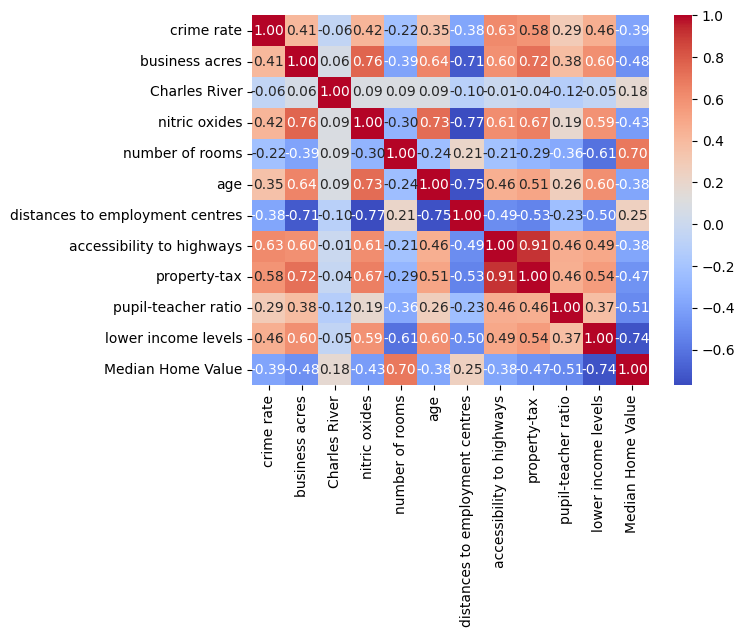

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


## Variance Inflation Factor (VIF)
- VIF quantifies how much the variance of the estimated regression coefficients is inflated due to collinearity with other variables. A high VIF (greater than 10) suggests high multicollinearity.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming df is your dataset with the predictor variables
X = df.drop('Median Home Value', axis=1)  # Drop the target column (if you have one)
X = add_constant(X)  # Add constant for intercept

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                           Variable         VIF
0                             const  535.108623
1                        crime rate    1.754285
2                    business acres    3.941711
3                     Charles River    1.070915
4                     nitric oxides    4.363193
5                   number of rooms    1.866306
6                               age    3.043624
7   distances to employment centres    3.313305
8         accessibility to highways    7.360171
9                      property-tax    8.554539
10              pupil-teacher ratio    1.623263
11              lower income levels    2.863016


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df.drop(columns='Median Home Value',axis=1)
y=df['Median Home Value']

In [30]:
X

,crime rate,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.00906,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,7.85
2,0.01096,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,8.23
3,0.01301,1.52,0,0.442,7.241,49.3,7.0379,1,284,15.5,5.49
4,0.01311,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,4.81
...,...,...,...,...,...,...,...,...,...,...,...
501,45.74610,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,36.98
502,51.13580,18.10,0,0.597,5.757,100.0,1.4130,24,666,20.2,10.11
503,67.92080,18.10,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98
504,73.53410,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,20.62


In [31]:
y

0      24.0
1      32.2
2      22.0
3      32.7
4      35.4
       ... 
501     7.0
502    15.0
503     5.0
504     8.8
505    10.4
Name: Median Home Value, Length: 506, dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

In [33]:
VIF=pd.DataFrame()

VIF['VIF']=[variance_inflation_factor(X_scaler, i) for i in range(X_scaler.shape[1])]
VIF['Features']=X.columns
VIF

,VIF,Features
0,1.754285,crime rate
1,3.941711,business acres
2,1.070915,Charles River
3,4.363193,nitric oxides
4,1.866306,number of rooms
5,3.043624,age
6,3.313305,distances to employment centres
7,7.360171,accessibility to highways
8,8.554539,property-tax
9,1.623263,pupil-teacher ratio


In [34]:
from statsmodels.tools.tools import add_constant

X_new=add_constant(X)

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_new.values, i ) for i in range(X_new.shape[1])]
vif['featurs']=X_new.columns
vif

,vif,featurs
0,535.108623,const
1,1.754285,crime rate
2,3.941711,business acres
3,1.070915,Charles River
4,4.363193,nitric oxides
5,1.866306,number of rooms
6,3.043624,age
7,3.313305,distances to employment centres
8,7.360171,accessibility to highways
9,8.554539,property-tax


- Variables with a VIF higher than 10 should be investigated for possible multicollinearity issues.

## Condition Number
- The condition number measures the sensitivity of the regression solution to small changes in the data. A high condition number (typically above 30) suggests multicollinearity.